<a href="https://colab.research.google.com/github/daisyjaneabasolo/Laboratory-Work-3_Custom-Image-Classifier/blob/main/Laboratory_Work_3_Custom_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: | Step 2: Upload Dataset to Google Drive

https://drive.google.com/drive/folders/1PYhLm5pSJCEtcaJ2AtnXczYGqJkAUgUW?usp=drive_link

Part 1: | Step 4: Mount Google Drive in Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Part 1: | Step 5: Define Dataset Path

In [2]:
dataset_path = "/content/drive/MyDrive/ImageDataset"

Part 1: | Step 6: Load Images Using TensorFlow

In [3]:
import tensorflow as tf
img_height = 180
img_width = 180
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 5001 files belonging to 20 classes.
Using 4001 files for training.
Found 5001 files belonging to 20 classes.
Using 1000 files for validation.


Part 1: | Step 7: View Class Names

In [4]:
class_names = train_ds.class_names
print(class_names)

['classa money plant', 'classb english ivy', 'classc sweet potato vine', 'classd ground morning glory', 'classe strawberry', 'classf creeping jenny', 'classg periwinkle', "classh baby's tears", 'classi virginia creeper', 'classj asiatic jasmine', "classk dutchman's pipe", 'classl trailing lantana', 'classm hoya', 'classn mondo grass', 'classo golden pothos', 'classp trailing verbena', 'classq purple heart', 'classr partridge berry', 'classs rock cress', 'classt trailing rosemary']


Part 2: | Step 1: Optimize Dataset Performance

In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Part 2: | Step 2: Build the CNN Model

In [6]:
from tensorflow.keras import layers, models
model = models.Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(len(class_names))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Part 2: | Step 3: Compile the Model

In [7]:
model.compile(
 optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy']
)

Part 2: | Step 4: Train the Model

In [8]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1023s 2s/step - accuracy: 0.0825 - loss: 3.0129 - val_accuracy: 0.2520 - val_loss: 2.3812
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 101s 646ms/step - accuracy: 0.2884 - loss: 2.2458 - val_accuracy: 0.3360 - val_loss: 2.1637
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 93s 736ms/step - accuracy: 0.4100 - loss: 1.9306 - val_accuracy: 0.4200 - val_loss: 1.8944
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 133s 664ms/step - accuracy: 0.5296 - loss: 1.5254 - val_accuracy: 0.4390 - val_loss: 1.7757
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 84s 670ms/step - accuracy: 0.7020 - loss: 1.0114 - val_accuracy: 0.4840 - val_loss: 1.8680
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 98s 779ms/step - accuracy: 0.8273 - loss: 0.5857 - val_accuracy: 0.4840 - val_loss: 2.0756
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 134s 715ms/step - accuracy: 0.9214 - loss: 0.2849 - val_accuracy: 0.4660 - val_loss: 2.6402
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 90s 712ms/step - accuracy: 0.9675 - loss:

Part 2: | Step 5: Evaluate Model Performance

In [9]:
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.4723 - loss: 3.1807
Validation Accuracy: 0.48100000619888306


Part 2: | Step 6: Test with a New Image

In [10]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
img_path = "/content/drive/MyDrive/test.jpg"
img = load_img(img_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("Predicted Class:", class_names[np.argmax(score)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class: classj asiatic jasmine


Part 3: | Step 1: Plot Training vs Validation Accuracy and Loss

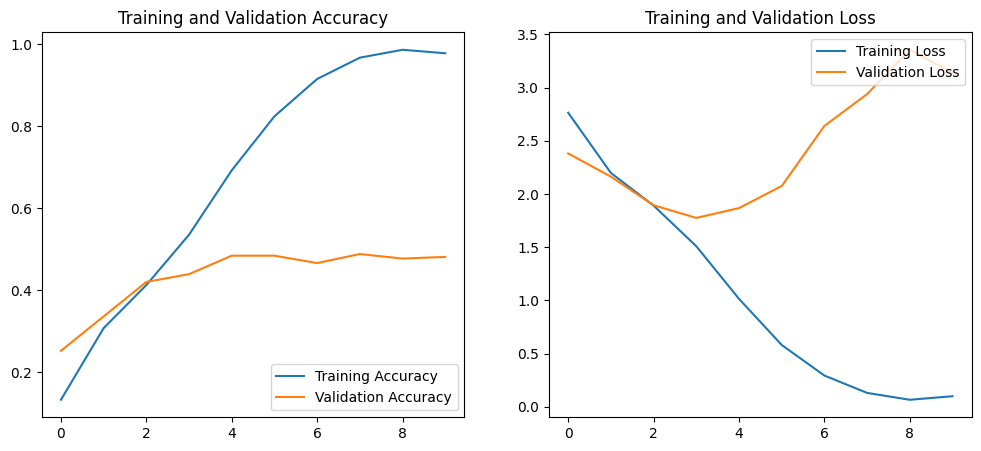

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Part 4: | Step 1: Create Data Augmentation Layer

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

Part 4: | Step 2: Visualize Augmented Images

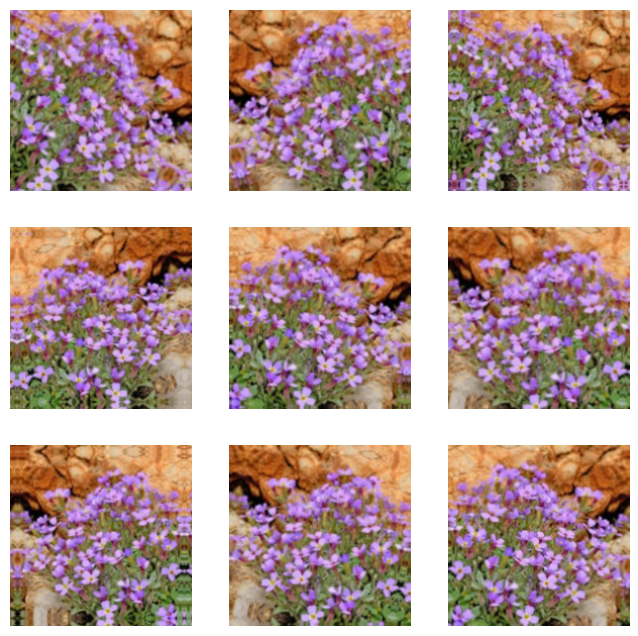

In [13]:
import matplotlib.pyplot as plt

for images, _ in train_ds.take(1):
  plt.figure(figsize=(8, 8))
  for i in range(9):
     augmented_images = data_augmentation(images)
     ax = plt.subplot(3, 3, i + 1)
     plt.imshow(augmented_images[0].numpy().astype("uint8"))
     plt.axis("off")

Part 5: | Step 1: Build an improved CNN Model

In [14]:
model = models.Sequential([
data_augmentation,
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.3),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dropout(0.3),
layers.Dense(len(class_names))

])

Part 6: | Step 1: Compile Model

In [15]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

Part 6: | Step 2: Train Model

In [16]:
epochs = 15
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 100s 783ms/step - accuracy: 0.1014 - loss: 2.8806 - val_accuracy: 0.2640 - val_loss: 2.3762
Epoch 2/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 105s 834ms/step - accuracy: 0.2525 - loss: 2.4050 - val_accuracy: 0.3210 - val_loss: 2.1611
Epoch 3/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 137s 797ms/step - accuracy: 0.3081 - loss: 2.1716 - val_accuracy: 0.3680 - val_loss: 1.9845
Epoch 4/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 99s 789ms/step - accuracy: 0.3385 - loss: 2.0573 - val_accuracy: 0.3790 - val_loss: 1.9256
Epoch 5/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 143s 795ms/step - accuracy: 0.3618 - loss: 1.9601 - val_accuracy: 0.3980 - val_loss: 1.8655
Epoch 6/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 100s 792ms/step - accuracy: 0.3946 - loss: 1.9201 - val_accuracy: 0.4290 - val_loss: 1.7625
Epoch 7/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 98s 781ms/step - accuracy: 0.4257 - loss: 1.8060 - val_accuracy: 0.4340 - val_loss: 1.7059
Epoch 8/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 101s 807ms/step - accuracy: 0.4274 - l

Part 6: | Step 3: Visualize Improved Training Results  |Repeat the plotting code from Part 3 to compare performance.

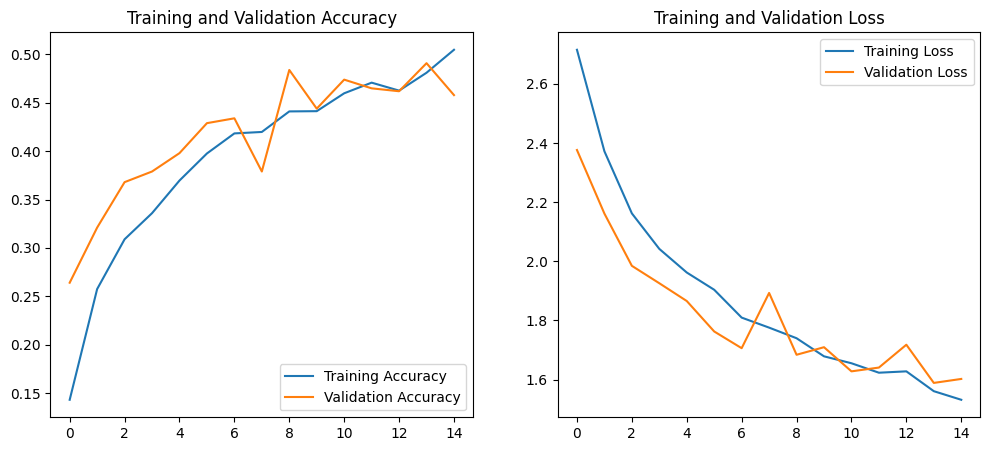

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Part 7: | Predict on New Data

In [18]:
img_path = "/content/drive/MyDrive/test_image.jpg"
img = load_img(img_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("Predicted Class:", class_names[np.argmax(score)])
print("Confidence:", round(100 * np.max(score), 2), "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: classe strawberry
Confidence: 95.04 %


Part 8: | Step 1: Save Model to Google Drive

In [25]:
model.save("/content/drive/MyDrive/my_image_classifier.keras")

Part 8: | Step 2: Load Saved Model

In [27]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/my_image_classifier.keras")